# Implementing Artificial Neuron


In [ ]:
import math 


In [ ]:
inputs = [.5,.3,.2]
weights = [.4,.7,.2]
outputs = []



In [ ]:
def sigmoid(x):
  y = 1.0 / (1 + math.exp(-x))
  return y
  
def activate(inputs,weights):
  h= 0
  # perform net input
  for x,w in zip(inputs,weights):
    h+= x*w

  # perform the activation

  return sigmoid(h)

In [ ]:
outputs = activate(inputs,weights)
print(outputs)

0.610639233949222


# TensorFlow Neural Network

In [ ]:
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
import tensorflow as tf 

In [ ]:
def generate_dataset(num_samples,test_size):
  x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
  y = np.array([[i[0] + i[1]] for i in x])
  return train_test_split(x,y,test_size=test_size)

In [ ]:
X_train, X_test, y_train, y_test = generate_dataset(5000,0.3)


In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
      tf.keras.layers.Dense(1, activation="sigmoid")                       
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="MSE")

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
110/110 [==============================] - 0s 794us/step - loss: 0.0548
Epoch 2/100
110/110 [==============================] - 0s 838us/step - loss: 0.0443
Epoch 3/100
110/110 [==============================] - 0s 781us/step - loss: 0.0440
Epoch 4/100
110/110 [==============================] - 0s 799us/step - loss: 0.0437
Epoch 5/100
110/110 [==============================] - 0s 819us/step - loss: 0.0435
Epoch 6/100
110/110 [==============================] - 0s 831us/step - loss: 0.0432
Epoch 7/100
110/110 [==============================] - 0s 822us/step - loss: 0.0430
Epoch 8/100
110/110 [==============================] - 0s 854us/step - loss: 0.0427
Epoch 9/100
110/110 [==============================] - 0s 843us/step - loss: 0.0425
Epoch 10/100
110/110 [==============================] - 0s 783us/step - loss: 0.0422
Epoch 11/100
110/110 [==============================] - 0s 832us/step - loss: 0.0420
Epoch 12/100
110/110 [==============================] - 0s 794us/step - lo

In [ ]:
print("Model Evaluation")

Model Evaluation


In [ ]:
model.evaluate(X_test,y_test, verbose=1)

47/47 [==============================] - 0s 837us/step - loss: 0.0011


0.0010781203163787723

In [ ]:
data = np.array([[0.1,0.2], [0.2,0.2]])
predictions = model.predict(data) 
for d , p in zip(data,predictions):
  print(f'{d[0]}, {d[1]}, {p[0]}')


0.1, 0.2, 0.31186866760253906
0.2, 0.2, 0.40508246421813965


# Sound Audio Processing 



In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np 

file ="blues.00000.wav"

signal, sr = librosa.load(file,sr=22050) # sr* T = 22050 * 30
signal.size


661794

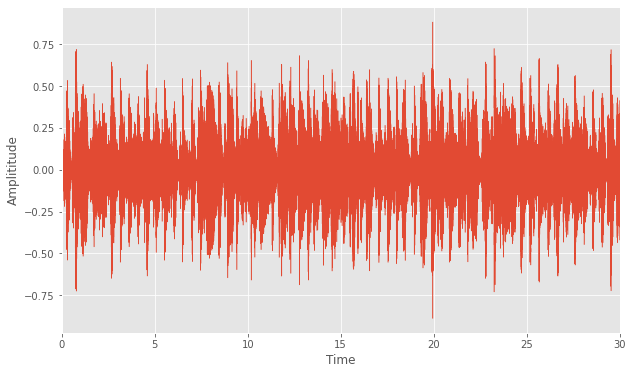

In [ ]:
plt.figure(figsize=(10,6))
librosa.display.waveplot(signal,sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplititude')
plt.show()

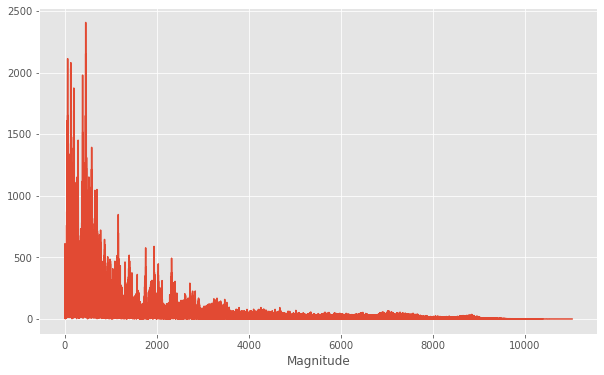

661794


In [ ]:
## FT 

fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]


plt.figure(figsize=(10,6))
plt.plot(left_frequency, left_magnitude)
plt.xlabel('Frequency')
plt.xlabel('Magnitude')
plt.show()

print(len(frequency))



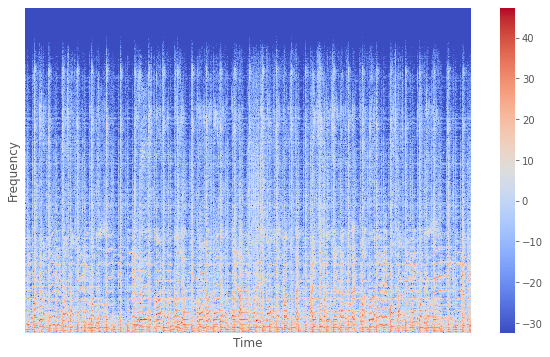

In [ ]:
n_fft = 2048 ## no of samples per fft
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)

#plotting 
plt.figure(figsize=(10,6))
librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)



plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

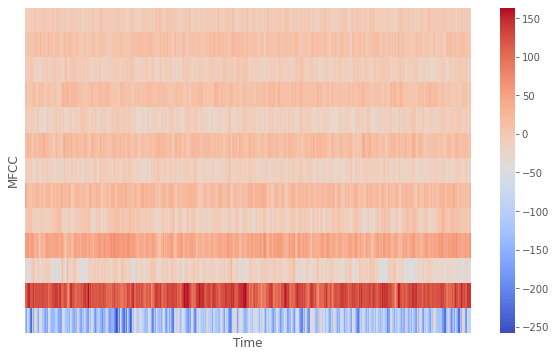

In [ ]:
MFFCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

#plotting 
plt.figure(figsize=(10,6))
librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)



plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

# Preprocessing Dataset


In [ ]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz

--2020-08-07 20:14:27--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  1.58MB/s    in 12m 41s 

2020-08-07 20:27:08 (1.54 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]



In [ ]:
!tar xvzf genres.tar.gz

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

In [ ]:
import os
import librosa
import math 
import json
from pprint import pprint
from tqdm import tqdm
DATASET_PATH = "genres"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
DURATION = 30 #measured by seconds 
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
def save_mfcc(dataset_path,json_path, n_mfcc=13,n_fft=2048,hop_length=512, num_segments=5):
  # dictionary to store data 
  # data = {
  #     "mapping" : ["classical","blues"],
  #     "mfcc" : [ [...], [...], [...]  ],
  #     "labels" : [0,0,1],
  # }

  data = {
      "mapping" : [],
      "mfcc" : [],
      "labels" : [],
  }

  num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
  expected_n_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

  for i, (dirpath,dirname,filenames) in (enumerate(os.walk(dataset_path))):
    # ensure we are not at the root level
    if (dirpath) is not dataset_path:
      #Save the semantic label
      dirpath_components = dirpath.split('/') # genre/blues = ["genre", "blues"]
      semantic_label = dirpath_components[-1]
      data["mapping"].append(semantic_label)
      
      pprint(f"Processing {semantic_label}")

      # process files for specific genre

      for f in tqdm(filenames):
        file_path = os.path.join(dirpath,f)
        signal,sr = librosa.load(file_path, sr=SAMPLE_RATE)
        
        # process segments, extracting mfcc, storing data
        for s in range(num_segments):
          start_sample = num_samples_per_segment * s  # s= 0 -> 0
          finish_sample = start_sample + num_samples_per_segment  # s =0 -> num_samples_per_segment



          mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], 
                                      sr=sr,
                                      n_fft= n_fft,
                                      n_mfcc=n_mfcc,
                                      hop_length=hop_length
                                      )
          mfcc = mfcc.T

          #Store if expected == mfcc length
          if(len(mfcc) == expected_n_mfcc_vectors_per_segment):
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(i-1)
          
  with open(json_path, "w") as fp:
    json.dump(data,fp,indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


  0%|          | 0/100 [00:00<?, ?it/s]

'Processing metal'



100%|██████████| 100/100 [00:44<00:00,  2.23it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing classical'



100%|██████████| 100/100 [00:42<00:00,  2.33it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing rock'



100%|██████████| 100/100 [00:44<00:00,  2.25it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing jazz'



100%|██████████| 100/100 [00:42<00:00,  2.33it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing pop'



100%|██████████| 100/100 [00:41<00:00,  2.42it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing disco'



100%|██████████| 100/100 [00:42<00:00,  2.36it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing blues'



100%|██████████| 100/100 [00:46<00:00,  2.14it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing reggae'



100%|██████████| 100/100 [00:45<00:00,  2.20it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing country'



100%|██████████| 100/100 [00:47<00:00,  2.12it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

'Processing hiphop'



100%|██████████| 100/100 [00:50<00:00,  2.00it/s]


# Building NN for Classification

In [ ]:
# Libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

In [ ]:

# CONSTANTS
DATASET_PATH ="/content/drive/My Drive/Google Colab Data/Music Genre Detection /data.json"


In [ ]:


# Load the data 
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

    # convert lists into numpy array
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets


inputs, targets = load_data(DATASET_PATH)

In [ ]:
# Split the data into training and test 

x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.3)

In [ ]:
# model 

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2] )) ,      
        keras.layers.Dense(512,activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256,activation="relu" , kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64,activation="relu" , kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10,activation="softmax"),


])

In [ ]:
def plot_history(history):
  figs, axs= plt.subplots(2)

  # accuracy subplot 

  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_xlabel("Epoch")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title('Accuracy Eval') 



  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_accuracy"], label="test error")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Label")

  axs[1].legend(loc="upper right")
  axs[1].set_title('Error Eval') 

  plt.show()


In [ ]:
# compilation 

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=50, batch_size=32)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

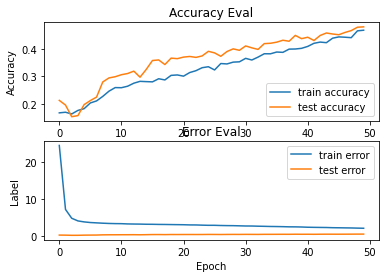

In [ ]:
plot_history(history)

# Music Classification using CNN

In [ ]:
# Libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 
from keras import backend as K

# CONSTANTS
DATASET_PATH ="/content/drive/My Drive/Google Colab Data/Music Genre Detection /data.json"


# Load the data 
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

    # convert lists into numpy array
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

def prepare_datasets(test_size,val_size):
  X , y= load_data(DATASET_PATH)

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
  
  # CNN expects a 3d array , (130, 3 ,1 )

  X_train = X_train[..., np.newaxis]
  X_val = X_val[..., np.newaxis]
  X_test = X_test[..., np.newaxis]

  return X_train, X_val, X_test ,y_train, y_val, y_test




def plot_history(history):
  figs, axs= plt.subplots(2)

  # accuracy subplot 

  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_xlabel("Epoch")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title('Accuracy Eval') 



  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_accuracy"], label="test error")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Loss")

  axs[1].legend(loc="upper right")
  axs[1].set_title('Error Eval') 

  plt.show()


In [ ]:
def build_model(input_shape):

  model = keras.Sequential()

  #1st conv layer and pooling layer
  model.add(keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())

  #2nd conv layer and pooling layer

  model.add(keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())


  #3rd conv layer and pooling layer


  model.add(keras.layers.Conv2D(32,(2,2),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())

  #flatten and feed to dense
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation="relu"))  
  model.add(keras.layers.Dropout(0.3))
  #softmax output 

  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

(5997, 130, 13, 1)


In [ ]:
def predict(model,X,y):
  X = X[np.newaxis, ...]

  pred = model.predict(X)
  predicted_index = np.argmax(pred, axis=1)
  print(f"Prediction is: {predicted_index[0]}")
  print(f"Expected is: {y}")


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 1, 32)        

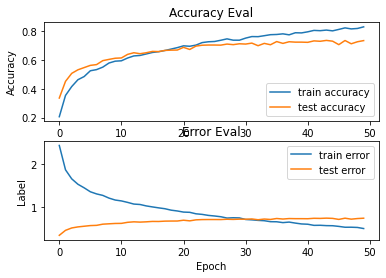

Prediction is: 2
Expected is: 2


In [ ]:
if __name__ == "__main__":
  X_train, X_val, X_test ,y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

  # model 
  input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

  model = build_model(input_shape)

  # compilation
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  model.summary()
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=32, epochs=50)

  # evaluate 

  test_error, test_accuracy = model.evaluate(X_test,y_test, verbose=1)

  print(f"Accuracy on test set is: {test_accuracy}")
  print(f"Error on test set is: {test_error}")


  plot_history(history)


  X = X_test[106]
  y= y_test[106]
  predict(model,X,y)



# Music Genre Classification RNN-LSTM

In [ ]:

def prepare_datasets(test_size,val_size):
  X , y= load_data(DATASET_PATH)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
  
  return X_train, X_val, X_test ,y_train, y_val, y_test

In [ ]:
def build_model(input_shape):
  """Generates RNN-LSTM Model
  :param input_shape(tuple): shape of input set
  :return model: RNN-LSTM Model """

  model = keras.Sequential()

  # 3 LSTM Layers

  model.add(keras.layers.LSTM(64,input_shape=input_shape, return_sequences=True))
  model.add(keras.layers.LSTM(64, return_sequences=True))
  model.add(keras.layers.LSTM(64))

  # dense layer
  model.add(keras.layers.Dense(64, activation="relu"))

  model.add(keras.layers.Dropout(0.2))


  #softmax output 
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 130, 64)           33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 90,826
Trainable params: 90,826
Non-trainable params: 0
_________________________________________________

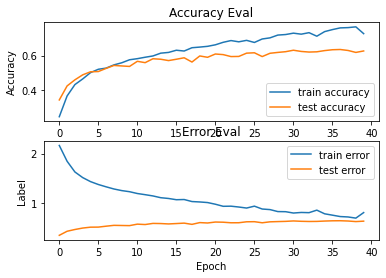

Prediction is: 8
Expected is: 3


In [ ]:
if __name__ == "__main__":
  X_train, X_val, X_test ,y_train, y_val, y_test = prepare_datasets(0.3, 0.2)

  # model 
  input_shape = (X_train.shape[1], X_train.shape[2] )

  model = build_model(input_shape)

  # compilation
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  model.summary()
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=32, epochs=40)

  # evaluate 

  test_error, test_accuracy = model.evaluate(X_test,y_test, verbose=1)

  print(f"Accuracy on test set is: {test_accuracy}")
  print(f"Error on test set is: {test_error}")


  plot_history(history)


  X = X_test[106]
  y= y_test[106]
  predict(model,X,y)



# Music Genre Classification using GRU - Gated Recurrent Unit

In [ ]:
def build_model(input_shape):
  """Generates GRU Model
  :param input_shape(tuple): shape of input set
  :return model: GRU Model """

  model = keras.Sequential()

  # 3 GRU Layers
  model.add(keras.layers.GRU(128,input_shape=input_shape ,return_sequences=True))
  model.add(keras.layers.GRU(64,return_sequences=True))
  model.add(keras.layers.GRU(64,return_sequences=True))

  model.add(keras.layers.GRU(64))


  # dense layer
  model.add(keras.layers.Dense(64, activation="relu"))
  model.add(keras.layers.Dense(64, activation="relu"))
  model.add(keras.layers.Dropout(0.2))


  #softmax output 
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model




def prepare_datasets(test_size,val_size):
  X , y= load_data(DATASET_PATH)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
  

  return X_train, X_val, X_test ,y_train, y_val, y_test





In [ ]:
## Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


(130, 13)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_28 (GRU)                 (None, 130, 128)          54912     
_________________________________________________________________
gru_29 (GRU)                 (None, 130, 64)           37248     
_________________________________________________________________
gru_30 (GRU)                 (None, 130, 64)           24960     
_________________________________________________________________
gru_31 (GRU)                 (None, 64)                24960     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)    

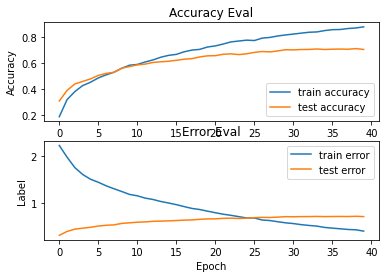

In [ ]:


if __name__ == "__main__":
  X_train, X_val, X_test ,y_train, y_val, y_test = prepare_datasets(0.2, 0.25)

  # model 
  input_shape = (X_train.shape[1], X_train.shape[2] )
  print(input_shape)
  model = build_model(input_shape)

  # # compilation
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy", f1_m,precision_m, recall_m])
  model.summary()
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=64, epochs=40)
  plot_history(history)



In [ ]:
error, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on test set is:  {accuracy}")
print(f"Error on test set is: {error}")
print(f"f1_score on test set is: {f1_score}")
print(f"precision on test set is: {precision}")
print(f"recall on test set is: {recall}")


Accuracy on test set is: 0.7269999980926514
Error on test set is: 0.9285241961479187
f1_score on test set is: 1.4325487613677979
precision on test set is: 1.4165042638778687
recall on test set is: 1.4525983333587646


In [ ]:



def predict(model,X,y):
  X = X[np.newaxis, ...]

  pred = model.predict(X)


  predicted_index = np.argmax(pred, axis=1)
  print(f"Prediction is: {predicted_index[0]}")
  print(f"Expected is: {y}")


X = X_test[102]
y= y_test[102]
predict(model,X,y)


Prediction is: 3
Expected is: 3
